https://pythonprogramming.net/autoencoders-tutorial/

In [3]:
import tensorflow as tf  
from tensorflow import keras
import cv2
import numpy as np

import matplotlib.pyplot as plt

In [2]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()  # loads the popular "mnist" training dataset

x_train = x_train/255.0  # scales the data. pixel values range from 0 to 255, so this makes it range 0 to 1
x_test = x_test/255.0  # scales the data. pixel values range from 0 to 255, so this makes it range 0 to 1

11490434/11490434 [==============================] - 1s 0us/step


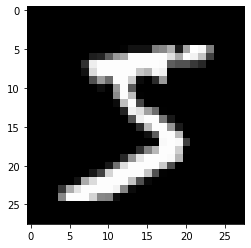

In [4]:
plt.imshow(x_train[0], cmap="gray")

In [ ]:
x_train[0]

 ## Encoder ##

In [10]:
encoder_input = keras.Input(shape=(28, 28, 1), name='img')
x = keras.layers.Flatten()(encoder_input)
encoder_output = keras.layers.Dense(64, activation="relu")(x)
encoder = keras.Model(encoder_input, encoder_output, name='encoder')

## Decoder ##

In [11]:
decoder_input = keras.layers.Dense(64, activation="relu")(encoder_output)
x = keras.layers.Dense(784, activation="relu")(decoder_input)
decoder_output = keras.layers.Reshape((28, 28, 1))(x)

## Autoencoder ##

In [14]:
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.001, decay=1e-6)
autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')
autoencoder.summary()
autoencoder.compile(opt, loss='mse')

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                50240     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 784)               50960     
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
Total params: 105,360
Trainable params: 105,360
Non-tra

In [25]:
epochs=3

for epoch in range(epochs):

    history = autoencoder.fit(x_train,x_train,batch_size=32, validation_split=0.10)

1688/1688 [==============================] - 3s 2ms/step - loss: 0.0118 - val_loss: 0.0119


In [29]:
example = encoder.predict([ x_test[0].reshape(-1, 28, 28, 1) ])

print(example[0].shape)
print(example[0])

1/1 [==============================] - 0s 37ms/step
(64,)
[1.1145247  0.03651181 1.1735824  0.7950214  1.1516682  1.4307877
 1.2582582  1.0358329  1.3566947  0.         1.2024913  2.3770351
 0.6494666  0.80271065 1.4288737  2.0343943  1.7520455  2.6897397
 1.0994793  1.0853585  1.4943871  0.5650408  0.63068277 1.5186479
 0.         1.4198754  0.         2.5392363  1.7709185  0.
 1.3549085  0.12691    0.8447912  2.6134384  1.5379236  1.5108658
 1.4123505  1.9514132  0.96205807 1.2489926  0.68400586 2.113082
 2.6283996  0.         1.5189145  1.8387173  1.312472   1.4477296
 1.4239391  3.8229742  1.3743358  1.1807926  2.370531   1.9257331
 1.9314202  1.4298357  1.20245    1.0374135  0.30634993 2.596506
 1.3890743  2.284935   1.0908897  1.7902474 ]


(64,)


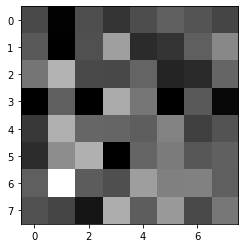

In [30]:
print(example[0].shape)
plt.imshow(example[0].reshape((8,8)), cmap="gray")

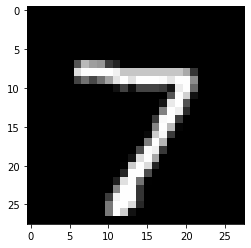

In [31]:
plt.imshow(x_test[0], cmap="gray")

1/1 [==============================] - 0s 27ms/step


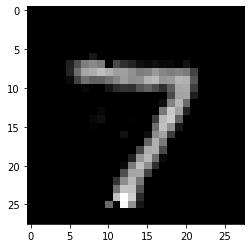

In [32]:
ae_out = autoencoder.predict([ x_test[0].reshape(-1, 28, 28, 1) ])
img = ae_out[0]  # predict is done on a vector, and returns a vector, even if its just 1 element, so we still need to grab the 0th
plt.imshow(ae_out[0], cmap="gray")